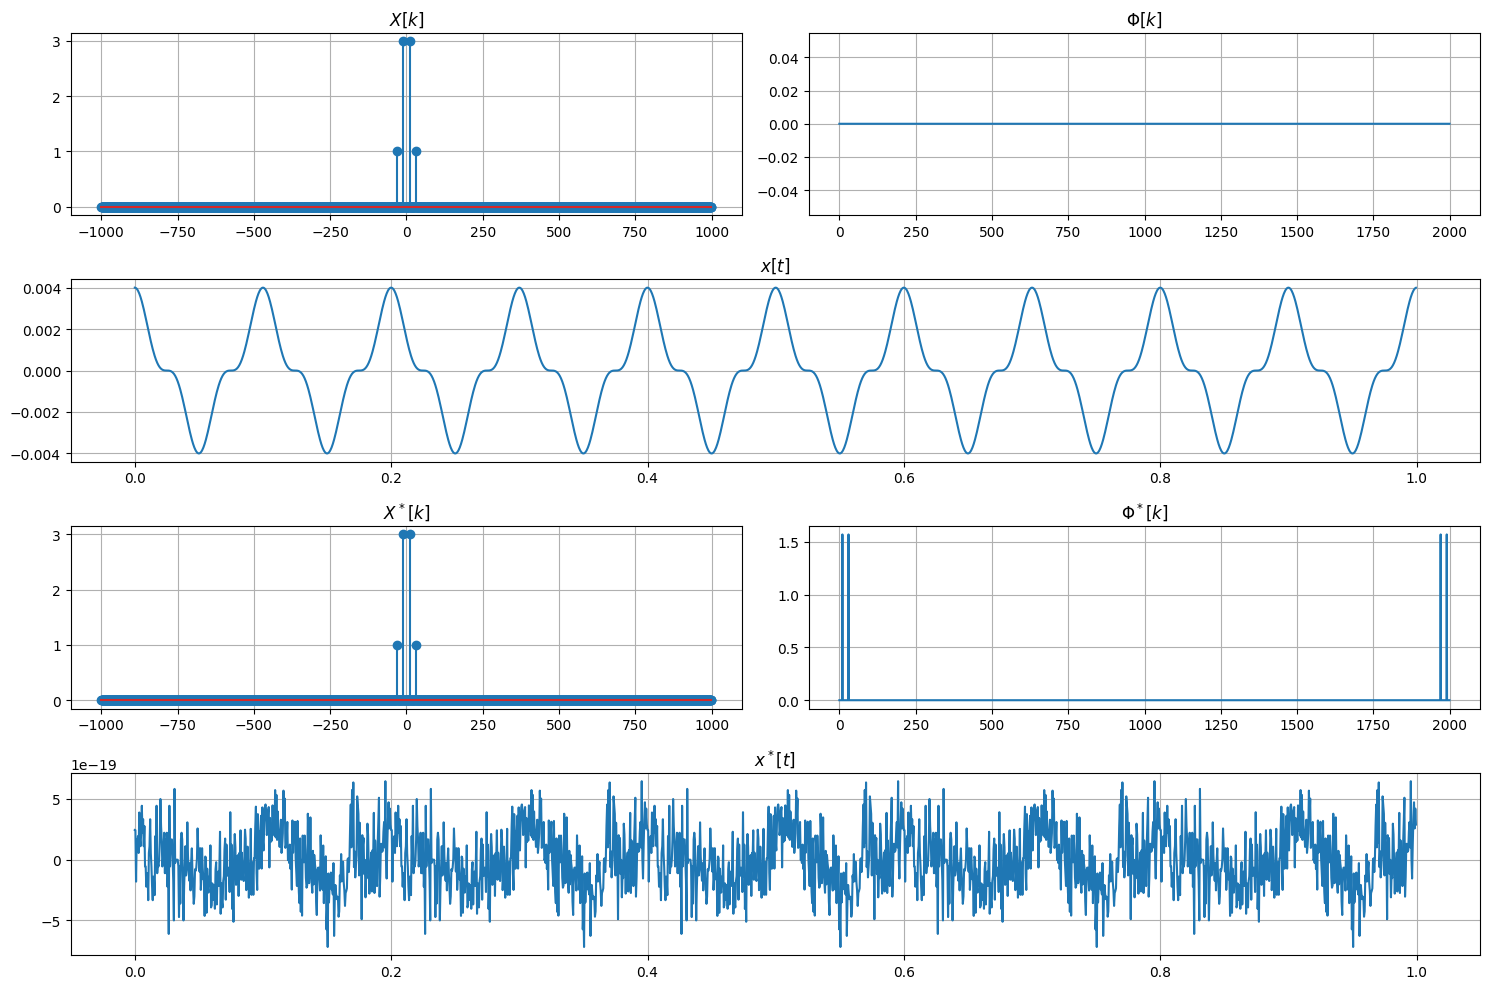

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros
Tini = 0
Tfin = 1
fm = 2000
fm1 = 10
fm2 = 30
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
N = len(t)
f = np.fft.fftfreq(N,1/fm)

# Espectro
S = np.zeros(N,dtype=complex)
S[fm1] = 3 + 0j
S[-fm1] = 3 + 0j
S[fm2] = 1 + 0j
S[-fm2] = 1 + 0j

# Senial en tiempo
s = np.fft.ifft(S).real

# Aplicar "filtro"
ang = np.pi/2
c = [np.cos(ang) + 1j*np.sin(ang) for _ in range(N)]
ST = S*c                    # espectro filtrado
st = np.fft.ifft(ST).real   # señal filtrada

# Graficar
fig = plt.figure()
ax = [
    plt.subplot2grid([4,2],[0,0]),
    plt.subplot2grid([4,2],[0,1]),
    plt.subplot2grid([4,1],[1,0]),
    plt.subplot2grid([4,2],[2,0]),
    plt.subplot2grid([4,2],[2,1]),
    plt.subplot2grid([4,1],[3,0]),
]
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].stem(f,np.abs(S))
ax[0].set_title('$X[k]$')
ax[1].plot(np.angle(S))
ax[1].set_title('$\\Phi[k]$')

ax[2].plot(t,s)
ax[2].set_title('$x[t]$')

ax[3].stem(f,np.abs(ST))
ax[3].set_title('$X^*[k]$')
ax[4].plot(np.angle(ST))
ax[4].set_title('$\\Phi^*[k]$')

ax[5].plot(t,st)
ax[5].set_title('$x^*[t]$')
fig.tight_layout()